# Clustering with scikit-learn

In this notebook we will perform k-means clustering using scikit-learn in Python.

We will use cluster analysis to generate a big picture model of the weather at a local station using minute-graunlarity data.



## Importing the necessary libraries



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

## Reading csv file

In [5]:
data = pd.read_csv('minute_weather.csv')

In [6]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [7]:
data.shape

(1587257, 13)

In [8]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [11]:
data[['air_pressure', 'air_temp']].mean()

air_pressure    916.830127
air_temp         61.851440
dtype: float64

## Getting rid of null values

In [13]:
data.dropna()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587252,1587252,2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
1587253,1587253,2014-09-10 23:56:29,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
1587254,1587254,2014-09-10 23:57:29,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
1587255,1587255,2014-09-10 23:58:29,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2


Data sampling

In [14]:
sample_data = data[(data['rowID'] % 10)== 0]
sample_data.shape

(158726, 13)

## Statistics for more insight in the data

In [20]:
sample_data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587260e+05,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,7.936250e+05,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,4.582039e+05,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,3.968125e+05,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936250e+05,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,1.190438e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,1.587250e+06,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [21]:
sample_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,1587257.0,793628.000000,458201.772448,0.00,396814.0,793628.00,1190442.00,1587256.00
air_pressure,1587257.0,916.830127,3.051593,905.00,914.8,916.70,918.70,929.50
air_temp,1587257.0,61.851440,11.833624,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1586824.0,161.965379,95.208120,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1586824.0,2.774272,2.060758,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1586824.0,163.403048,92.367234,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1586824.0,3.399813,2.423167,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1586824.0,166.826371,97.462746,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1586824.0,2.133130,1.745345,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1587256.0,0.001855,0.960972,0.00,0.0,0.00,0.00,655.01


In [30]:
sample_data[sample_data['rain_accumulation'] == 0].shape


(157812, 13)

In [31]:
sample_data[sample_data['rain_duration'] == 0].shape


(157237, 13)

In [32]:
del sample_data['rain_accumulation']
del sample_data['rain_duration']

In [33]:
before = sample_data.shape[0]
sample_data = sample_data.dropna()
after = sample_data.shape[0]

In [34]:
before - after

46

In [35]:
sample_data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

## Select Features of interest

In [39]:
features = ['air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed',
       'max_wind_speed', 'max_wind_direction',
       'relative_humidity']

In [40]:
selected_data = sample_data[features]

In [41]:
selected_data.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_speed', 'max_wind_direction', 'relative_humidity'],
      dtype='object')

## Features using StandardScaler

In [51]:
X = StandardScaler().fit_transform(selected_data)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.74440309,
        -0.62153592,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ..., -0.66171726,
         0.03826701, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.37231683,
        -0.44847286,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ..., -0.70306017,
         2.0393087 ,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -0.74440309,
        -1.67073075, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -0.62037434,
        -1.55174989, -0.05711747]])

## k-Means Clustering

In [62]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)


model
 KMeans(n_clusters=12)


In [64]:
centers = model.cluster_centers_
centers

array([[-0.20840652,  0.63292192,  0.4087205 ,  0.73489959,  0.67291389,
         0.51694566, -0.15343367],
       [ 0.06362176, -0.79164919, -1.19863867, -0.5701083 , -0.58467756,
        -1.04471736,  0.88012242],
       [ 0.25540754, -0.99638242,  0.65841018, -0.54656157, -0.52934667,
         0.84948138,  1.15716263],
       [ 1.36795606, -0.0817625 , -1.205352  , -0.05349005, -0.03332189,
        -1.07387265, -0.97760689],
       [ 0.13570633,  0.83326429,  1.41395079, -0.63912056, -0.59012395,
         1.67841751, -0.71391844],
       [-0.72649431,  0.50943987,  0.17161783, -0.58191521, -0.59535846,
         0.34100284, -0.08635967],
       [-1.18343877, -0.87160205,  0.44692307,  1.98210268,  1.94332825,
         0.53851156,  0.90990929],
       [-0.16358705,  0.86333339, -1.31186099, -0.58944718, -0.60477078,
        -1.16792997, -0.64103322],
       [ 0.23408423,  0.31953646,  1.88812551, -0.65185933, -0.57668253,
        -1.55163058, -0.28283962],
       [ 0.68412088,  0.4851

## Plots

In [65]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [66]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [67]:
P = pd_centers(features,centers)

## Dry Days

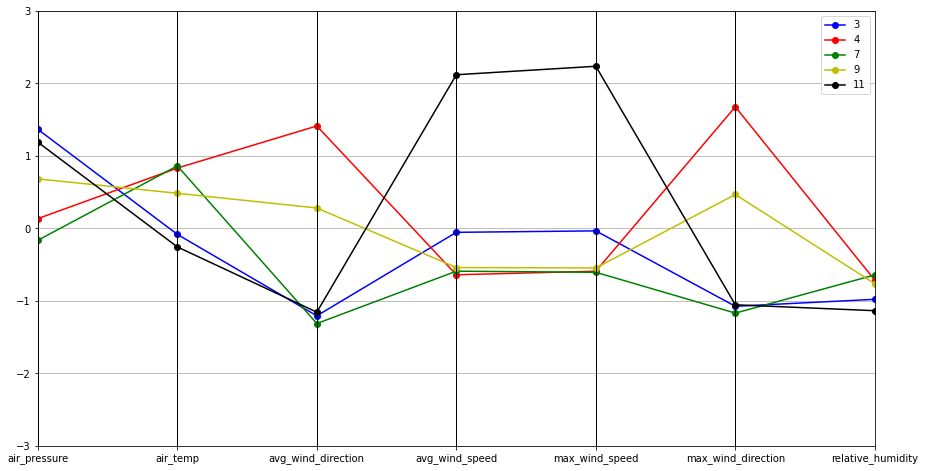

In [69]:
parallel_plot(P[P['relative_humidity']< -0.5])

## Warm Days

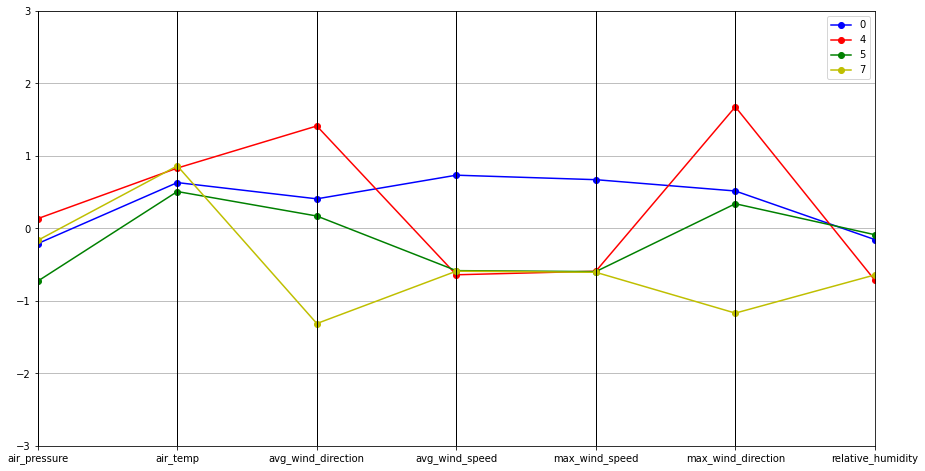

In [70]:
parallel_plot(P[P['air_temp']> 0.5])

## Cool Days